In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
read_mat = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTeneSkmDNGvAYqCr_AoX_skBl10MrI5GTJ6p1hpsKFS1sME2xmgMab4u7HzdK4W8E6ADk5VX8FyoIT/pub?gid=1209425280&single=true&output=csv')
read_por = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTeneSkmDNGvAYqCr_AoX_skBl10MrI5GTJ6p1hpsKFS1sME2xmgMab4u7HzdK4W8E6ADk5VX8FyoIT/pub?gid=998950341&single=true&output=csv')

In [7]:
read_mat.head()

,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,qualidade_rel_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
read_por.head()

,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,qualidade_rel_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
from sklearn.preprocessing import LabelEncoder
# --- 3. Tratamento de valores nulos ---
for col in read_por.columns:
    if read_por[col].dtype == 'object':
        read_por[col] = read_por[col].fillna('não informado')
    else:
        read_por[col] = read_por[col].fillna(read_por[col].median())

# --- 4. Pré-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
read_por_proc = preprocessamento(read_por)

In [9]:
# --- 3. Tratamento de valores nulos ---
for col in read_mat.columns:
    if read_mat[col].dtype == 'object':
        read_mat[col] = read_mat[col].fillna('não informado')
    else:
        read_mat[col] = read_mat[col].fillna(read_mat[col].median())

# --- 4. Pré-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
read_mat_proc = preprocessamento(read_mat)

In [10]:
read_mat_proc.head()

,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,qualidade_rel_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [11]:
read_por_proc.head()

,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,qualidade_rel_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [37]:
from sklearn.preprocessing import MinMaxScaler
X_mat = read_mat_proc.drop('nota_final', axis=1)
y_mat = read_mat_proc['nota_final']

X_por = read_por_proc.drop('nota_final', axis=1)
y_por = read_por_proc['nota_final']

scaler = MinMaxScaler()
X_mat = scaler.fit_transform(X_mat)
X_por = scaler.fit_transform(X_por)

In [38]:
from sklearn.model_selection import train_test_split

X_mat_train, X_mat_test, y_mat_train, y_mat_test = train_test_split(X_mat, y_mat, test_size=0.2, random_state=42)
X_por_train, X_por_test, y_por_train, y_por_test = train_test_split(X_por, y_por, test_size=0.2, random_state=42)

In [45]:
print("Valores únicos em y_mat:", np.unique(y_mat_train))
print("Total de classes:", len(np.unique(y_mat_train)))


Valores únicos em y_mat: [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Total de classes: 18


In [40]:
X_mat_train.shape

(316, 32)

In [41]:
X_por_train.shape

(519, 32)

In [60]:
modelo_geral = keras.Sequential([keras.layers.InputLayer(shape=([32,]), name= 'entrada'),
                               keras.layers.Dense(512, activation='relu', name='oculta',
                                                kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                               keras.layers.Dense(21,activation='softmax', name='saida')])

In [61]:
modelo_geral.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ oculta (Dense)                       │ (None, 512)                 │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ saida (Dense)                        │ (None, 21)                  │          10,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,669 (108.08 KB)

 Trainable params: 27,669 (108.08 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
modelo_geral.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



epocas=100
historico_mat = modelo_geral.fit(X_mat_train,y_mat_train,
           epochs=epocas,
           validation_split=0.3)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0621 - loss: 2.9823 - val_accuracy: 0.1263 - val_loss: 2.8172
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1713 - loss: 2.7149 - val_accuracy: 0.1263 - val_loss: 2.6484
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1765 - loss: 2.5549 - val_accuracy: 0.1579 - val_loss: 2.5741
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2243 - loss: 2.4770 - val_accuracy: 0.1684 - val_loss: 2.5419
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3030 - loss: 2.4279 - val_accuracy: 0.1474 - val_loss: 2.5281
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2812 - loss: 2.4341 - val_accuracy: 0.1684 - val_loss: 2.5111
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2764 - loss: 2.3192 - val_accuracy: 0.1579 - val_loss: 2.5064
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3117 - loss: 2.3103 - val_accuracy: 0.2000 - val_loss:

In [63]:
modelo_geral.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



epocas=100
historico_por = modelo_geral.fit(X_por_train,y_por_train,
           epochs=epocas,
           validation_split=0.3)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2141 - loss: 2.8723 - val_accuracy: 0.1538 - val_loss: 2.9380
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2704 - loss: 2.6252 - val_accuracy: 0.1538 - val_loss: 2.6920
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2916 - loss: 2.3891 - val_accuracy: 0.1795 - val_loss: 2.5532
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2709 - loss: 2.2712 - val_accuracy: 0.1859 - val_loss: 2.4517
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3121 - loss: 2.0324 - val_accuracy: 0.1987 - val_loss: 2.3803
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3620 - loss: 1.8383 - val_accuracy: 0.1923 - val_loss: 2.3309
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3592 - loss: 1.8262 - val_accuracy: 0.1859 - val_loss: 2.2727
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3713 - loss: 1.8170 - val_accuracy: 0.1859 -

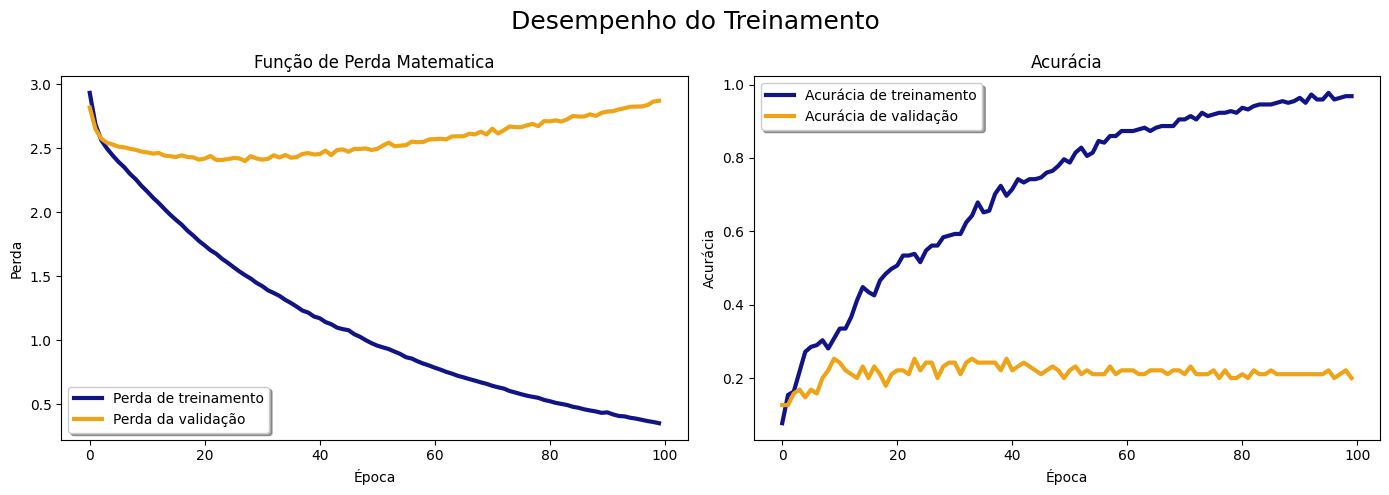

In [65]:
# Gráfico customizado corrigido
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot da perda
ax[0].plot(historico_mat.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico_mat.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Função de Perda Matematica')
ax[0].set_xlabel('Época')
ax[0].set_ylabel('Perda')

# Plot da acurácia
ax[1].plot(historico_mat.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico_mat.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Acurácia')
ax[1].set_xlabel('Época')
ax[1].set_ylabel('Acurácia')

plt.suptitle('Desempenho do Treinamento', fontsize=18)
plt.tight_layout()
plt.show()


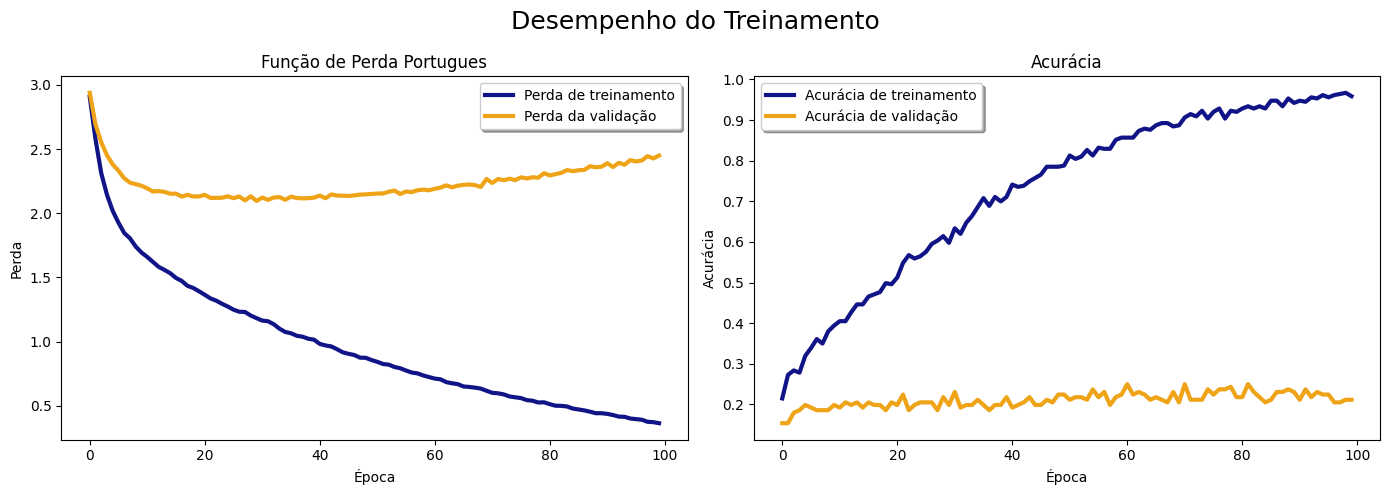

In [66]:
# Gráfico customizado corrigido
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot da perda
ax[0].plot(historico_por.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico_por.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Função de Perda Portugues')
ax[0].set_xlabel('Época')
ax[0].set_ylabel('Perda')

# Plot da acurácia
ax[1].plot(historico_por.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico_por.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Acurácia')
ax[1].set_xlabel('Época')
ax[1].set_ylabel('Acurácia')

plt.suptitle('Desempenho do Treinamento', fontsize=18)
plt.tight_layout()
plt.show()

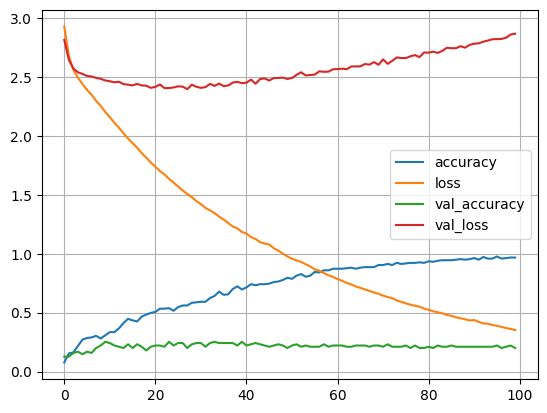

In [67]:
pd.DataFrame(historico_mat.history).plot()
plt.grid()
plt.show()

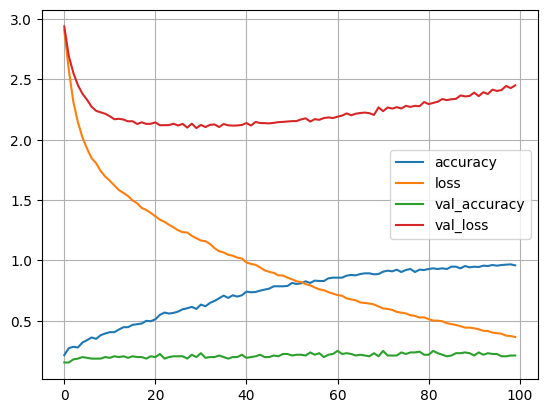

In [68]:
pd.DataFrame(historico_por.history).plot()
plt.grid()
plt.show()